In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
import random
import time

In [76]:
#Initialize variables (Make sure that K divides N and that N/K is an even number)
target_string = "this is our target"
alphabet = list(string.ascii_lowercase) + [' ']

def fitness(candidate):
    correct_characters = 0

    for i, char in enumerate(target_string):
        if char == candidate[i]:
            correct_characters += 1

    return correct_characters / len(target_string)

def crossover(parent1, parent2):
    crossover_point = random.randrange(1, len(parent1))

    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    return child1, child2

def string_search(K = 2, mutation_p = 0.01, N = 1000, crossover_p = 1):
    max_generations = 1000
    population = []

    # Create population
    for _ in range(N):
        population.append(np.random.choice(alphabet, len(target_string)).tolist())

    for _ in range(max_generations):
        # K tournament selection
        parents = []
        indexes = np.random.permutation(len(population))
        pairs = zip(*[iter(indexes)]*K)
        for pair in pairs:
            fittest_candidate = None
            fitness_candidate = -1

            for index in pair:
                fitness_current = fitness(population[index])

                # Check if candidate is target solution and break out of loop
                # if (fitness_current == 1):
                #     return

                if fitness_current > fitness_candidate:
                    fittest_candidate = population[index]
                    fitness_candidate = fitness_current

            parents.append(fittest_candidate)
        
        # Create new population with crossover and mutation
        population = []

        if random.random() < crossover_p:
            # Create num_parents * K new children
            for _ in range(K):
                indexes = np.random.permutation(len(parents))
                pairs = zip(*[iter(indexes)]*2)
                for pair in pairs:
                    child1, child2 = crossover(parents[pair[0]], parents[pair[1]])
                    population += [child1, child2]
                
        for candidate in population:
            for i, _ in enumerate(candidate):
                if random.random() < mutation_p:
                    new_char = alphabet[random.randrange(0, len(alphabet))]
                    candidate[i] = new_char

        # Check if candidate is target solution and break out of loop
        for candidate in population:
            if fitness(candidate) == 1:
                return
    
    print("Not found")



In [77]:
def visualize_distribution(times):
    x = np.arange(1, 21, 1)
    plt.bar(x, times)
    plt.xticks(np.arange(1,21,1))
    mean = np.mean(np.array(times))
    std = np.std(np.array(times))
    plt.axhline(mean, color='r')
    plt.errorbar(10, mean, std, ecolor='r')
    plt.title("Runtime for different runs of the GA string search algorithm")
    plt.xlabel("Runs")
    plt.ylabel("")
    plt.show()

In [78]:
times_experiment_1 = []

for _ in range(20):
    start_time = time.time()
    string_search(2, 0.01)
    times_experiment_1.append(time.time() - start_time)

In [82]:
times_experiment_2 = []

for _ in range(20):
    start_time = time.time()
    string_search(2, 0)
    times_experiment_2.append(time.time() - start_time)

In [80]:
times_experiment_3 = []

for _ in range(20):
    start_time = time.time()
    string_search(2, 0.1)
    times_experiment_3.append(time.time() - start_time)

Not found
Not found


KeyboardInterrupt: 

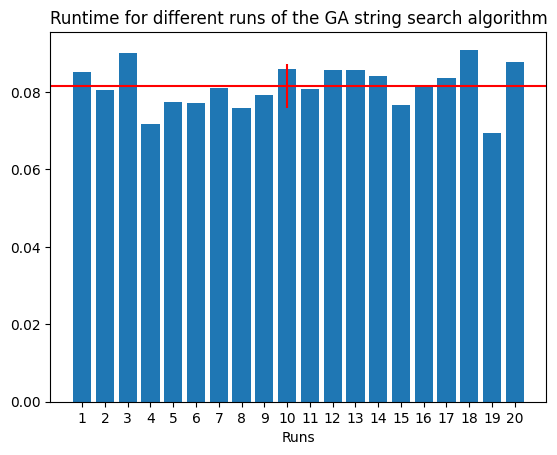

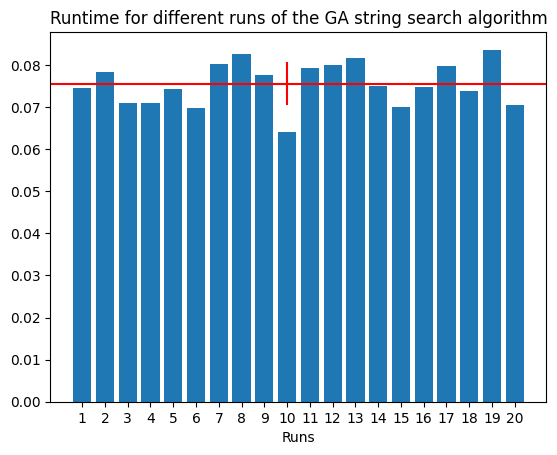

In [83]:
visualize_distribution(times_experiment_1)
visualize_distribution(times_experiment_2)

In [30]:
times_experiment_4 = []

for mu_large in range(0, 75, 5):
    # divide by 1000 because range only takes integers as parameters
    mu = mu_large / 1000
    print(f"Currently running mu: {mu}")
    times_mu = []
    for _ in range(10):
        start_time = time.time()
        string_search(2, mu)
        times_mu.append(time.time() - start_time)

    times_experiment_4.append(times_mu)

Currently running mu: 0.0
Currently running mu: 0.005
Currently running mu: 0.01
Currently running mu: 0.015
Currently running mu: 0.02
Currently running mu: 0.025
Currently running mu: 0.03
Currently running mu: 0.035
Currently running mu: 0.04
Currently running mu: 0.045
Currently running mu: 0.05
Currently running mu: 0.055
Currently running mu: 0.06
Currently running mu: 0.065
Currently running mu: 0.07


In [37]:
means    = []
std_devs = []

for mu in times_experiment_4:
    arr = np.array(mu)
    means.append(np.mean(arr))
    std_devs.append(np.std(arr))

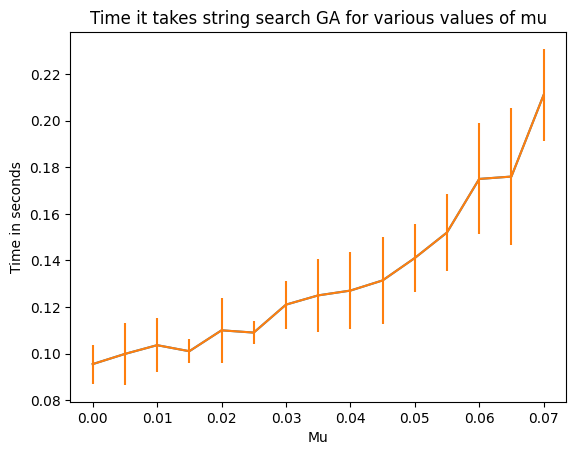

In [38]:
x = np.arange(0, 0.07, 0.005)
plt.plot(x,means)
plt.errorbar(x, means, std_devs)
plt.title("Time it takes string search GA for various values of mu")
plt.ylabel("Time in seconds")
plt.xlabel("Mu")
plt.show()

In [39]:
times_experiment_5 = []

for mu_large in range(0, 75, 5):
    # divide by 1000 because range only takes integers as parameters
    mu = mu_large / 1000
    print(f"Currently running mu: {mu}")
    times_mu = []
    for _ in range(10):
        start_time = time.time()
        string_search(5, mu)
        times_mu.append(time.time() - start_time)

    times_experiment_5.append(times_mu)

Currently running mu: 0.0
Currently running mu: 0.005
Currently running mu: 0.01
Currently running mu: 0.015
Currently running mu: 0.02
Currently running mu: 0.025
Currently running mu: 0.03
Currently running mu: 0.035
Currently running mu: 0.04
Currently running mu: 0.045
Currently running mu: 0.05
Currently running mu: 0.055
Currently running mu: 0.06
Currently running mu: 0.065
Currently running mu: 0.07


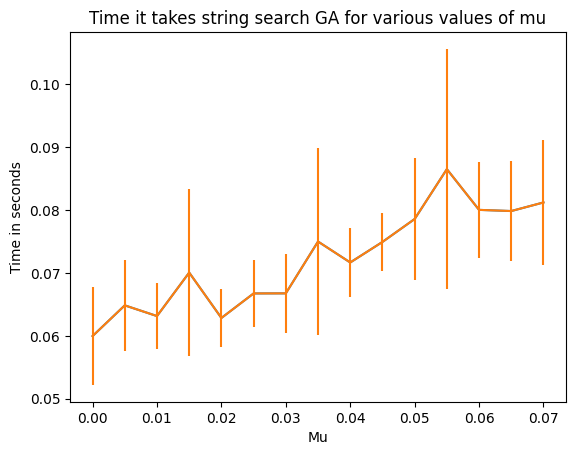

In [41]:
means    = []
std_devs = []

for mu in times_experiment_5:
    arr = np.array(mu)
    means.append(np.mean(arr))
    std_devs.append(np.std(arr))

x = np.arange(0, 0.07, 0.005)
plt.plot(x,means)
plt.errorbar(x, means, std_devs)
plt.title("Time it takes string search GA for various values of mu")
plt.ylabel("Time in seconds")
plt.xlabel("Mu")
plt.show()